In [ ]:
#imports and setup
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

print('Tensorflow Version:', tf.__version__)

2025-11-20 16:02:37.809968: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-20 16:02:37.865924: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-20 16:02:39.510003: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


Tensorflow Version: 2.20.0


In [18]:
import os
import numpy as np

# Create data/raw directory at root level (from notebooks/experimental/)
os.makedirs('../../data/raw', exist_ok=True)

# Load MNIST dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

# Save to root data/raw folder
np.savez_compressed('../../data/raw/mnist_dataset.npz', 
                   x_train=x_train, y_train=y_train, 
                   x_test=x_test, y_test=y_test)

print(f'Training data shape:{x_train.shape}')
print(f'Training label data shape:{y_train.shape}')
print(f'Testing data shape:{x_test.shape}')
print(f'Testing labels data shape:{y_test.shape}')
print('✓ Dataset saved to data/raw/mnist_dataset.npz')

Training data shape:(60000, 28, 28)
Training label data shape:(60000,)
Testing data shape:(10000, 28, 28)
Testing labels data shape:(10000,)
✓ Dataset saved to data/raw/mnist_dataset.npz


In [3]:
#Data understanding(EDA)
print('\n ===Data understanding (EDA ===)')
print(f'image data type: {x_train.dtype}')
print(f'Pixel value range: {x_train.min()},{x_train.max()}')
print(f'Image dimensions:{x_train.shape[1:]}')

# Label distribution in training dataset 
print(f'\n ===Label distribution in the training dataset===')
unique, counts = np.unique(y_train, return_counts=True)

for label,count in zip(unique,counts):
      print(f"Class {label}: {count} samples ({count/len(y_train)*100:.1f}%)")



 ===Data understanding (EDA ===)
image data type: uint8
Pixel value range: 0,255
Image dimensions:(28, 28)

 ===Label distribution in the training dataset===
Class 0: 5923 samples (9.9%)
Class 1: 6742 samples (11.2%)
Class 2: 5958 samples (9.9%)
Class 3: 6131 samples (10.2%)
Class 4: 5842 samples (9.7%)
Class 5: 5421 samples (9.0%)
Class 6: 5918 samples (9.9%)
Class 7: 6265 samples (10.4%)
Class 8: 5851 samples (9.8%)
Class 9: 5949 samples (9.9%)


Visualizing sample images


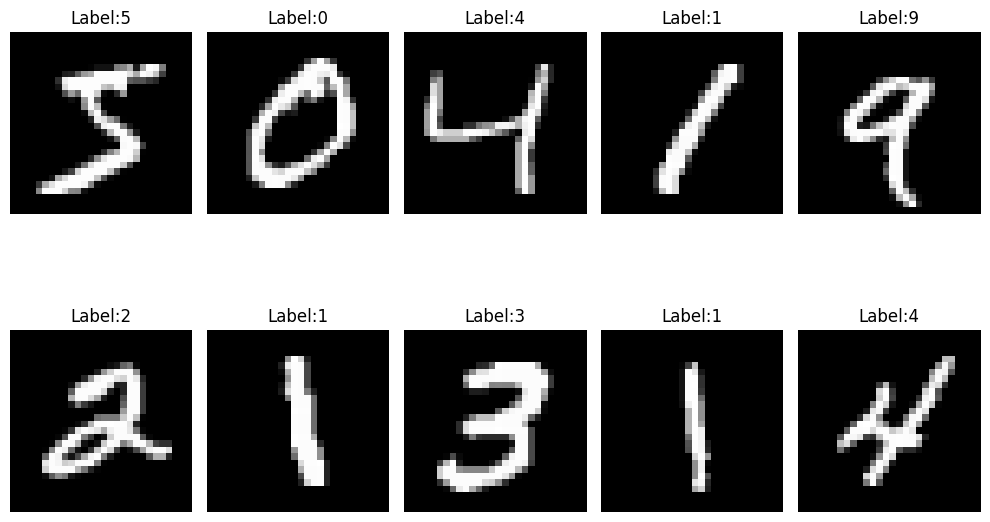

In [4]:
#Visualizing sample images
print('Visualizing sample images')
plt.figure(figsize=(10,7))

for i in range (10):
  plt.subplot(2,5,i + 1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label:{y_train[i]}")
  plt.axis('off')
plt.tight_layout()
plt.show()

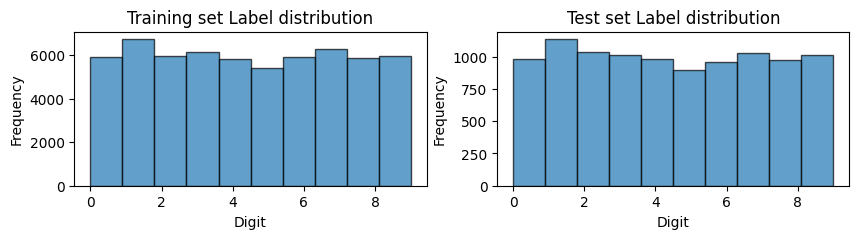

In [5]:
#visualizing label distributions 
# Plot label distributions
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
plt.hist(y_train,bins=10,alpha=0.7,edgecolor='black')
plt.title('Training set Label distribution')
plt.xlabel('Digit')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(y_test,bins=10,alpha=0.7, edgecolor='black' )
plt.title('Test set Label distribution')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.show()

In [6]:
#Data Cleaning

print('=== Data cleaning ===')
print('Checking for NaN values')
print(f'Training Nan values:{np.isnan(x_train).sum()}')
print(f'Testing Nan values:{np.isnan(x_test).sum()}')

#Check for corrupted images - completely black
zero_images_train=np.all(x_train==0, axis=(1,2))
zero_images_test=np.all(x_test==0, axis=(1,2))
print(f'All zero images in training:{zero_images_train.sum()}')
print(f'All zero images in testing:{zero_images_test.sum()}')

valid_indices_train = ~ zero_images_train
valid_indices_test = ~ zero_images_test

x_train_clean = x_train[valid_indices_train]
y_train_clean = y_train[valid_indices_train]
x_test_clean = x_test[valid_indices_test]
y_test_clean = y_test[valid_indices_test]

print(f"After cleaning - Training: {x_train_clean.shape}, Test: {x_test_clean.shape}")

=== Data cleaning ===
Checking for NaN values
Training Nan values:0
Testing Nan values:0
All zero images in training:0
All zero images in testing:0
After cleaning - Training: (60000, 28, 28), Test: (10000, 28, 28)


In [7]:
#Data labelling and splitting 
from sklearn.model_selection import train_test_split
print("=== STEP 4: Data Labeling & Organization ===")
print("Label verification - first 10 training samples:")
print("Labels:", y_train_clean[:10])
print("Unique labels in training:", np.unique(y_train_clean))

print("\n=== STEP 5: Data Splitting ===")
# Split training data into training and validation sets
x_temp, x_val, y_temp, y_val = train_test_split(
    x_train_clean, y_train_clean, 
    test_size=0.2, 
    random_state=42,
    stratify=y_train_clean
)

x_train_final = x_temp
y_train_final = y_temp

print(f"Final split sizes:")
print(f"Training set: {x_train_final.shape}")
print(f"Validation set: {x_val.shape}")
print(f"Test set: {x_test_clean.shape}")

# Verify class distribution
print("\nClass distribution verification:")
for split_name, x_data, y_data in [
    ("Training", x_train_final, y_train_final),
    ("Validation", x_val, y_val),
    ("Test", x_test_clean, y_test_clean)
]:
    unique, counts = np.unique(y_data, return_counts=True)
    print(f"{split_name}: {dict(zip(unique, counts))}")

=== STEP 4: Data Labeling & Organization ===
Label verification - first 10 training samples:
Labels: [5 0 4 1 9 2 1 3 1 4]
Unique labels in training: [0 1 2 3 4 5 6 7 8 9]

=== STEP 5: Data Splitting ===
Final split sizes:
Training set: (48000, 28, 28)
Validation set: (12000, 28, 28)
Test set: (10000, 28, 28)

Class distribution verification:
Training: {np.uint8(0): np.int64(4738), np.uint8(1): np.int64(5394), np.uint8(2): np.int64(4766), np.uint8(3): np.int64(4905), np.uint8(4): np.int64(4674), np.uint8(5): np.int64(4337), np.uint8(6): np.int64(4734), np.uint8(7): np.int64(5012), np.uint8(8): np.int64(4681), np.uint8(9): np.int64(4759)}
Validation: {np.uint8(0): np.int64(1185), np.uint8(1): np.int64(1348), np.uint8(2): np.int64(1192), np.uint8(3): np.int64(1226), np.uint8(4): np.int64(1168), np.uint8(5): np.int64(1084), np.uint8(6): np.int64(1184), np.uint8(7): np.int64(1253), np.uint8(8): np.int64(1170), np.uint8(9): np.int64(1190)}
Test: {np.uint8(0): np.int64(980), np.uint8(1): np.

In [8]:
#Data Preprocessing 
print("=== STEP 6: Data Preprocessing ===")
print(f'Original image size {x_train_final.shape[1:]}')

# Normalize pixel values between 0 to 1
x_train_normalized = x_train_final.astype('float32') / 255.0
x_val_normalized = x_val.astype('float32') / 255.0
x_test_normalized = x_test_clean.astype('float32') / 255.0

print(f"After normalization - pixel range: [{x_train_normalized.min():.3f}, {x_train_normalized.max():.3f}]")

# Reshape for CNN - add channel dimension
x_train_reshaped = x_train_normalized.reshape(-1, 28, 28, 1)
x_val_reshaped = x_val_normalized.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test_normalized.reshape(-1, 28, 28, 1)

print(f"After reshaping for CNN:")
print(f"Training shape: {x_train_reshaped.shape}")
print(f"Validation shape: {x_val_reshaped.shape}")
print(f"Test shape: {x_test_reshaped.shape}")

=== STEP 6: Data Preprocessing ===
Original image size (28, 28)
After normalization - pixel range: [0.000, 1.000]
After reshaping for CNN:
Training shape: (48000, 28, 28, 1)
Validation shape: (12000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


=== STEP 7: Data Augmentation (GPU Compatible) ===
GPU-compatible augmentation layer created

Visualizing augmented images...


2025-11-20 16:08:01.332333: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


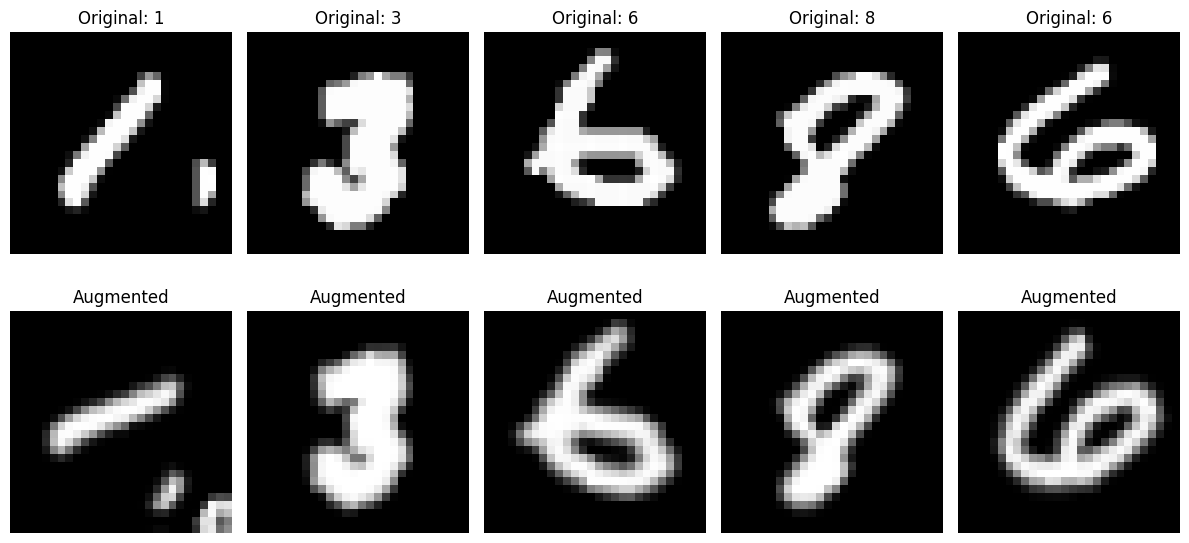

Simple GPU data augmentation ready!


In [9]:
#Data Augmentation
print("=== STEP 7: Data Augmentation (GPU Compatible) ===")

# Create a simple augmentation layer
augmentation_layer = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.1),  # ±10% rotation
    tf.keras.layers.RandomZoom(0.1),      # ±10% zoom
    tf.keras.layers.RandomContrast(0.2),  # ±20% contrast
])

print("GPU-compatible augmentation layer created")

# Visualize augmented images
print("\nVisualizing augmented images...")
sample_batch = x_train_reshaped[:5]

# Apply augmentation to sample images
augmented_images = augmentation_layer(sample_batch, training=True)

# Plot original vs augmented
plt.figure(figsize=(12, 6))
for i in range(5):
    # Original
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_batch[i].squeeze(), cmap='gray')
    plt.title(f'Original: {y_train_final[i]}')
    plt.axis('off')
    
    # Augmented
    plt.subplot(2, 5, i + 6)
    plt.imshow(augmented_images[i].numpy().squeeze(), cmap='gray')
    plt.title('Augmented')
    plt.axis('off')
plt.tight_layout()
plt.show()

print("Simple GPU data augmentation ready!")

In [10]:
#Data loading and batching 
print("=== STEP 8: Data Loading & Batching ===")
BATCH_SIZE = 32

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_reshaped, y_train_final))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val_reshaped, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_reshaped, y_test_clean))

print("Raw datasets created")
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")

=== STEP 8: Data Loading & Batching ===
Raw datasets created
Training samples: 48000
Validation samples: 12000
Test samples: 10000


2025-11-20 16:08:34.045272: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 150528000 exceeds 10% of free system memory.


In [11]:
#Data shuffling and prefetching 
print("=== STEP 9: Data Shuffling ===")
BUFFER_SIZE = 1000

train_dataset = train_dataset.shuffle(BUFFER_SIZE, seed=42)
val_dataset = val_dataset.shuffle(BUFFER_SIZE, seed=42)

print("Datasets shuffled with buffer size:", BUFFER_SIZE)

# Apply batching after shuffling
train_dataset = train_dataset.batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

print(f"Datasets batched with batch size: {BATCH_SIZE}")

print('=== Prefetching ===')
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)
print("Prefetching completed")

=== STEP 9: Data Shuffling ===
Datasets shuffled with buffer size: 1000
Datasets batched with batch size: 32
=== Prefetching ===
Prefetching completed


In [12]:
#Modal Building 
# Build and compile a modern CNN model
def create_modern_cnn():
    model = tf.keras.Sequential([
        # Input layer
        tf.keras.layers.Input(shape=(28, 28, 1)),
        
        # First Conv Block with BatchNorm and Dropout
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),
        
        # Second Conv Block
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),
        
        # Third Conv Block
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        
        # Global Average Pooling instead of Flatten
        tf.keras.layers.GlobalAveragePooling2D(),
        
        # Dense layers
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        
        # Output layer
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Create and compile model
model = create_modern_cnn()

# Modern compilation with AdamW and reduced learning rate
model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 208,874 (815.91 KB)

 Trainable params: 207,466 (810.41 KB)

 Non-trainable params: 1,408 (5.50 KB)

In [13]:
#Model Training 
# Train the model with modern callbacks
print("=== Starting Model Training ===")

# Define callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7
    ),
    tf.keras.callbacks.ModelCheckpoint(
        'best_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        save_weights_only=False
    )
]

# Train the model
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=val_dataset,
    callbacks=callbacks,
    verbose=1
)

=== Starting Model Training ===
Epoch 1/5


2025-11-20 16:10:06.210054: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 150528000 exceeds 10% of free system memory.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7244 - loss: 0.9156

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - accuracy: 0.8668 - loss: 0.4413 - val_accuracy: 0.9781 - val_loss: 0.0747 - learning_rate: 0.0010
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9545 - loss: 0.1513

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 103s 69ms/step - accuracy: 0.9602 - loss: 0.1346 - val_accuracy: 0.9822 - val_loss: 0.0605 - learning_rate: 0.0010
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9689 - loss: 0.1058

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 108s 72ms/step - accuracy: 0.9715 - loss: 0.0984 - val_accuracy: 0.9880 - val_loss: 0.0421 - learning_rate: 0.0010
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 109s 72ms/step - accuracy: 0.9766 - loss: 0.0805 - val_accuracy: 0.9872 - val_loss: 0.0435 - learning_rate: 0.0010
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 106s 70ms/step - accuracy: 0.9780 - loss: 0.0753 - val_accuracy: 0.9626 - val_loss: 0.1239 - learning_rate: 0.0010


In [ ]:
#Model Evaluation
# Evaluate the model on test data
print("=== Model Evaluation ===")
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions
print("\n=== Making Predictions ===")
predictions = model.predict(test_dataset)
predicted_classes = np.argmax(predictions, axis=1)

# Display sample predictions with true labels
print("\nSample Predictions:")
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_clean[i], cmap='gray')
    plt.title(f'True: {y_test_clean[i]}\nPred: {predicted_classes[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
#Performance analysis 
# Generate classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print("=== Classification Report ===")
print(classification_report(y_test_clean, predicted_classes))

print("\n=== Confusion Matrix ===")
cm = confusion_matrix(y_test_clean, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot training history and analyze model performance
plt.figure(figsize=(15, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Analyze final performance
print("=== Training Analysis ===")
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Generalization Gap: {final_train_acc - test_accuracy:.4f}")

In [ ]:
#Model saving
# Save the model and create deployment-ready artifacts
print("=== Saving Model and Artifacts ===")

# Save the entire model in modern Keras format
model.save('mnist_cnn_model.keras')
print("✓ Model saved as 'mnist_cnn_model.keras'")

# Save model architecture as JSON
model_json = model.to_json()
with open('model_architecture.json', 'w') as json_file:
    json_file.write(model_json)
print("✓ Model architecture saved as JSON")

# Save model weights with correct extension
model.save_weights('model_weights.weights.h5')
print("✓ Model weights saved")

# Create a summary file
with open('model_summary.txt', 'w') as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))
print("✓ Model summary saved")

print("\n🎯 All model artifacts saved successfully!")
print("Next: You can now deploy the model or use it for inference")